<a href="https://colab.research.google.com/github/RohanDubeySF/random/blob/main/maps/scaling/standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day24-standardization/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
df=df.drop(columns=['User ID', 'Gender'])
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Splitting the Data

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['Age','EstimatedSalary']],df['Purchased'],test_size=0.3,random_state=0)

x_train.shape, x_test.shape

((280, 2), (120, 2))

# Using Standard Scaler for Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(x_train) #getting the mean and standard deviation from the train dataset


StandardScaler()

In [8]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
x_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [11]:
x_train_scaled[:5]

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654]])

In [12]:
#when using transform the scaler returns numpy array as the result
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [13]:
np.round(x_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [14]:
np.round(x_train_scaled.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


# Visualize

Text(0.5, 1.0, 'Before Scaling')

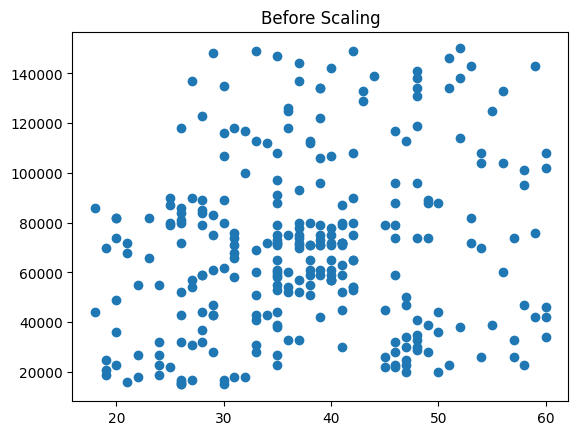

In [15]:
fig1=plt.scatter(x_train["Age"],x_train['EstimatedSalary'])
plt.title("Before Scaling")


Text(0.5, 1.0, 'After Scaling')

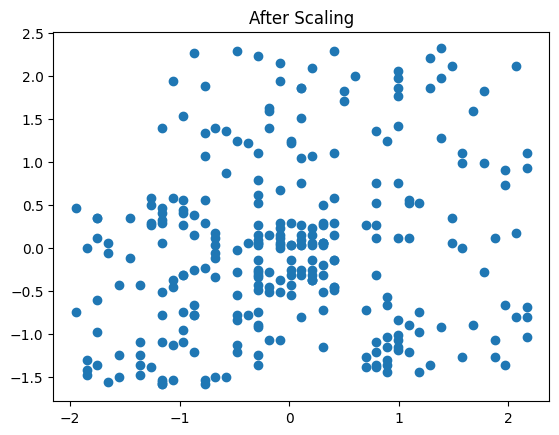

In [16]:
fig2=plt.scatter(x_train_scaled["Age"],x_train_scaled['EstimatedSalary'])
plt.title("After Scaling")

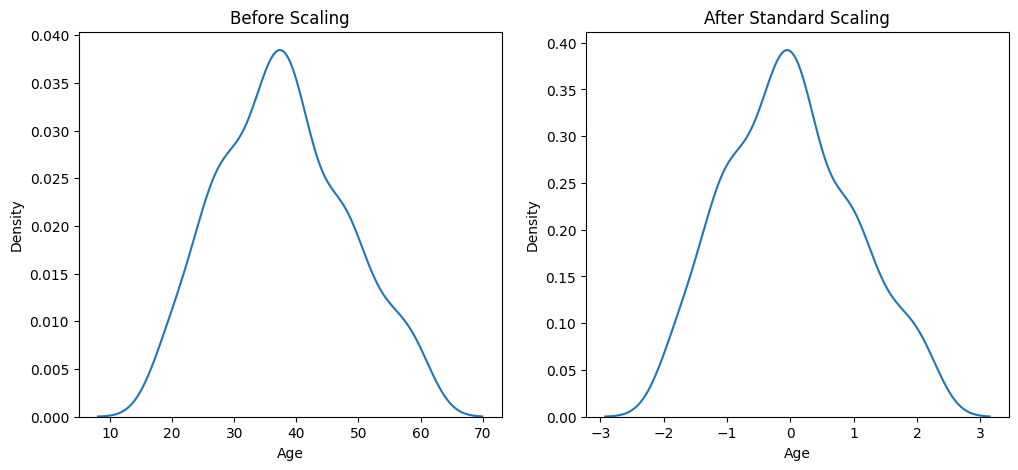

In [17]:
ig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')

sns.kdeplot(x_train_scaled['Age'], ax=ax2)

plt.show()

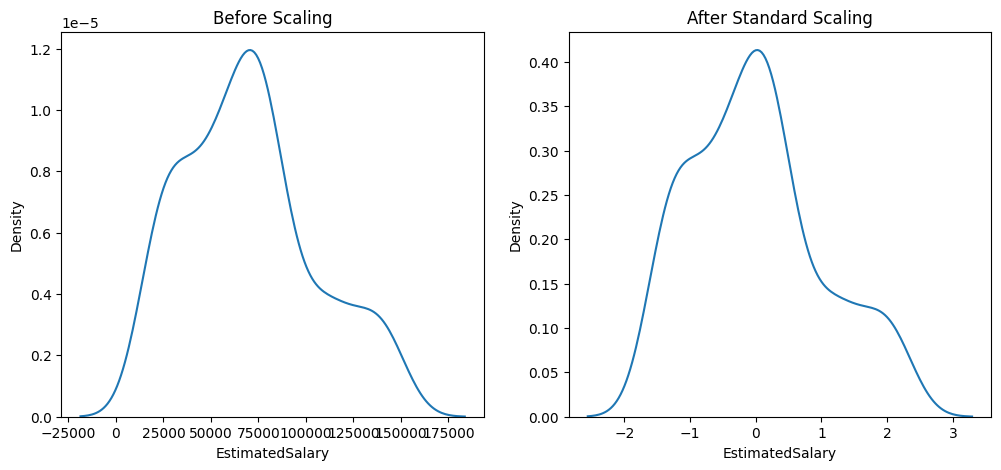

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

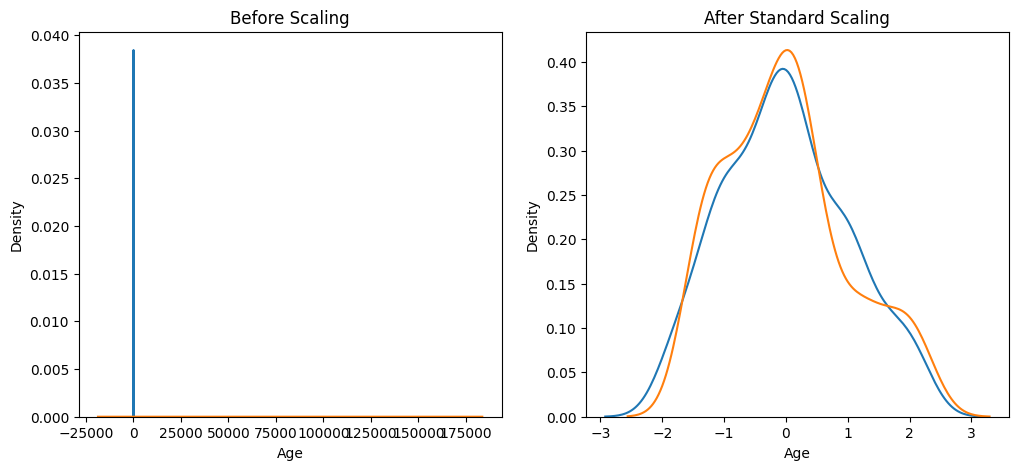

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

#Comparing Model Accuracy

In [20]:
from sklearn.linear_model import LogisticRegression
before=LogisticRegression()
after=LogisticRegression()

In [21]:
before.fit(x_train,y_train)
after.fit(x_train_scaled,y_train)

LogisticRegression()

In [22]:
y_pred=before.predict(x_test)
y_pred_scaled=after.predict(x_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.metrics import accuracy_score

print("Accuracy before Sclaing: ", accuracy_score(y_test,y_pred))
print("Accuracy after Sclaing: ", accuracy_score(y_test,y_pred_scaled))

Accuracy before Sclaing:  0.875
Accuracy after Sclaing:  0.8666666666666667
